In [1]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Hyper parameters setting
leaning_rate = 0.001
batch_size = 100
epochs = 10

In [3]:
# Load train, test data
## check a directory

os.listdir('../dataset/')

['train.zip', 'test', 'test.zip', 'train']

In [4]:
dir_train = '../dataset/train/'
dir_test = '../dataset/test/'
os.listdir(dir_train)[:5]

['cat.4953.jpg',
 'dog.10195.jpg',
 'dog.11436.jpg',
 'dog.2348.jpg',
 'dog.11005.jpg']

In [5]:
## check data
import glob

train_list = glob.glob(os.path.join(dir_train,'*.jpg'))
test_list = glob.glob(os.path.join(dir_test,'*.jpg'))

len(train_list)


25000

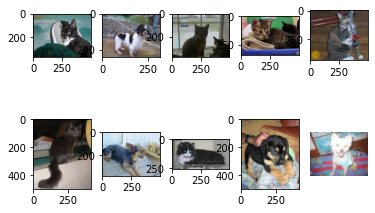

In [6]:
## check dataset
from PIL import Image
random_idx = np.random.randint(1,25000, size=10)
fig = plt.figure()

for i, idx in enumerate(random_idx, 1):
    fig.add_subplot(2,5,i)
    img = Image.open(train_list[idx])
    plt.imshow(img)

plt.axis('off')
plt.show()

In [7]:
train_list[0].split('/')[-1].split('.')[0]

'cat'

In [8]:
# split data train 
from sklearn.model_selection import train_test_split
train_list, val_list = train_test_split(train_list, test_size=0.2)

print(f"train list: {train_list[:5]}")
print(f"val list: {val_list[:5]}")
print(f"Lenght of train_list: {len(train_list)}")

train list: ['../dataset/train/dog.9161.jpg', '../dataset/train/cat.7939.jpg', '../dataset/train/dog.1741.jpg', '../dataset/train/dog.5846.jpg', '../dataset/train/cat.9102.jpg']
val list: ['../dataset/train/cat.12351.jpg', '../dataset/train/dog.9913.jpg', '../dataset/train/cat.1970.jpg', '../dataset/train/cat.8120.jpg', '../dataset/train/cat.3893.jpg']
Lenght of train_list: 20000


In [9]:
train_transforms =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    ])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    ])


test_transforms = transforms.Compose([   
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

In [10]:
# Load Datasets

class datasets(torch.utils.data.Dataset):
    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    # dataset length
    def __len__(self):
        return len(self.file_list)

    # load an one of images
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img)
        label = img_path.split('/')[-1].split('.')[0]
        label_img = 1 if label == 'dog' else 0
        return img_transformed, label_img

In [11]:
train_data = datasets(train_list, transform=train_transforms)
test_data = datasets(test_list, transform=test_transforms)
val_data = datasets(val_list, transform=val_transforms)

In [12]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)

In [13]:
print(f"Length of train_list before dataloader: {len(train_data)}")
print(f"Length of train_list after dataloader: {len(train_loader)}")

print(f"Length of val_list before dataloader: {len(val_data)}")
print(f"Length of val_list after dataloader: {len(val_loader)}")

Length of train_list before dataloader: 20000
Length of train_list after dataloader: 200
Length of val_list before dataloader: 5000
Length of val_list after dataloader: 50


In [44]:
print(train_loader)

## Build Model

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


In [86]:
m = nn.ReLU()
input = torch.randn(3).shape(2,3)
output = m(input)
print(input)
print(output)

TypeError: 'torch.Size' object is not callable

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0),-1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [16]:
model = CNN().to(device)
model.train()

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

## Set Loss function and optimizer

In [17]:
optimizer = optim.Adam(params=model.parameters(), lr=leaning_rate)
loss_fn = nn.CrossEntropyLoss()


## Train our Network

In [18]:
epochs = 5

for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)

        # compute prediction and loss
        output = model(data)
        loss = loss_fn(output, label)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = ((output.argmax(dim=1) == label).float().mean())
        epoch_accuracy += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)
    
    print('Epoch: {}, train accuracy: {}, train loss: {}'.format(epoch+1, epoch_accuracy, epoch_loss))

    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = loss_fn(val_output,label)
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))


        
        

Epoch: 1, train accuracy: 0.6464003920555115, train loss: 0.617265522480011
Epoch : 1, val_accuracy : 0.6832000613212585, val_loss : 0.5802837014198303
Epoch: 2, train accuracy: 0.7152004837989807, train loss: 0.552492618560791
Epoch : 2, val_accuracy : 0.715999960899353, val_loss : 0.5497255921363831
Epoch: 3, train accuracy: 0.733650267124176, train loss: 0.5261434316635132
Epoch : 3, val_accuracy : 0.7285999655723572, val_loss : 0.5264706611633301
Epoch: 4, train accuracy: 0.7458500862121582, train loss: 0.5057467222213745
Epoch : 4, val_accuracy : 0.7407998442649841, val_loss : 0.5094333291053772
Epoch: 5, train accuracy: 0.7523500323295593, train loss: 0.4941026568412781
Epoch : 5, val_accuracy : 0.7616000175476074, val_loss : 0.4835740625858307


## Test

In [19]:
dog_probs = []
model.eval()


CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
  (re

In [20]:
with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)
        preds_list = F.softmax(preds, dim=1)[:, 1].tolist()
        dog_probs += list(zip(list(fileid), preds_list))

In [21]:
dog_probs

[(tensor(0), 0.27196255326271057),
 (tensor(0), 0.6311182379722595),
 (tensor(0), 0.29380396008491516),
 (tensor(0), 0.593424379825592),
 (tensor(0), 0.03806544467806816),
 (tensor(0), 0.07702777534723282),
 (tensor(0), 0.9541627764701843),
 (tensor(0), 0.19750647246837616),
 (tensor(0), 0.9466503858566284),
 (tensor(0), 0.17224647104740143),
 (tensor(0), 0.3634476959705353),
 (tensor(0), 0.1356867104768753),
 (tensor(0), 0.5995728969573975),
 (tensor(0), 0.3427690267562866),
 (tensor(0), 0.3577514588832855),
 (tensor(0), 0.9433422684669495),
 (tensor(0), 0.9887657165527344),
 (tensor(0), 0.2812138497829437),
 (tensor(0), 0.3142099380493164),
 (tensor(0), 0.21294055879116058),
 (tensor(0), 0.5245214700698853),
 (tensor(0), 0.11947165429592133),
 (tensor(0), 0.06639711558818817),
 (tensor(0), 0.23625481128692627),
 (tensor(0), 0.28298038244247437),
 (tensor(0), 0.33454909920692444),
 (tensor(0), 0.31479522585868835),
 (tensor(0), 0.9733080267906189),
 (tensor(0), 0.25563570857048035),
 

In [22]:
dog_probs.sort(key = lambda x : int(x[0]))
dog_probs

[(tensor(0), 0.27196255326271057),
 (tensor(0), 0.6311182379722595),
 (tensor(0), 0.29380396008491516),
 (tensor(0), 0.593424379825592),
 (tensor(0), 0.03806544467806816),
 (tensor(0), 0.07702777534723282),
 (tensor(0), 0.9541627764701843),
 (tensor(0), 0.19750647246837616),
 (tensor(0), 0.9466503858566284),
 (tensor(0), 0.17224647104740143),
 (tensor(0), 0.3634476959705353),
 (tensor(0), 0.1356867104768753),
 (tensor(0), 0.5995728969573975),
 (tensor(0), 0.3427690267562866),
 (tensor(0), 0.3577514588832855),
 (tensor(0), 0.9433422684669495),
 (tensor(0), 0.9887657165527344),
 (tensor(0), 0.2812138497829437),
 (tensor(0), 0.3142099380493164),
 (tensor(0), 0.21294055879116058),
 (tensor(0), 0.5245214700698853),
 (tensor(0), 0.11947165429592133),
 (tensor(0), 0.06639711558818817),
 (tensor(0), 0.23625481128692627),
 (tensor(0), 0.28298038244247437),
 (tensor(0), 0.33454909920692444),
 (tensor(0), 0.31479522585868835),
 (tensor(0), 0.9733080267906189),
 (tensor(0), 0.25563570857048035),
 

In [97]:
idx = list(map(lambda x: x[0],dog_probs))
prob = list(map(lambda x: x[1],dog_probs))

In [99]:
submission = pd.DataFrame({'id':idx,'label':prob})
submission

,id,label
0,tensor(0),0.445165
1,tensor(0),0.990967
2,tensor(0),0.119603
3,tensor(0),0.950189
4,tensor(0),0.317541
...,...,...
12495,tensor(0),0.567328
12496,tensor(0),0.747604
12497,tensor(0),0.246410
12498,tensor(0),0.818596


In [100]:
submission.to_csv('result.csv',index=False)


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/test/0.jpg'

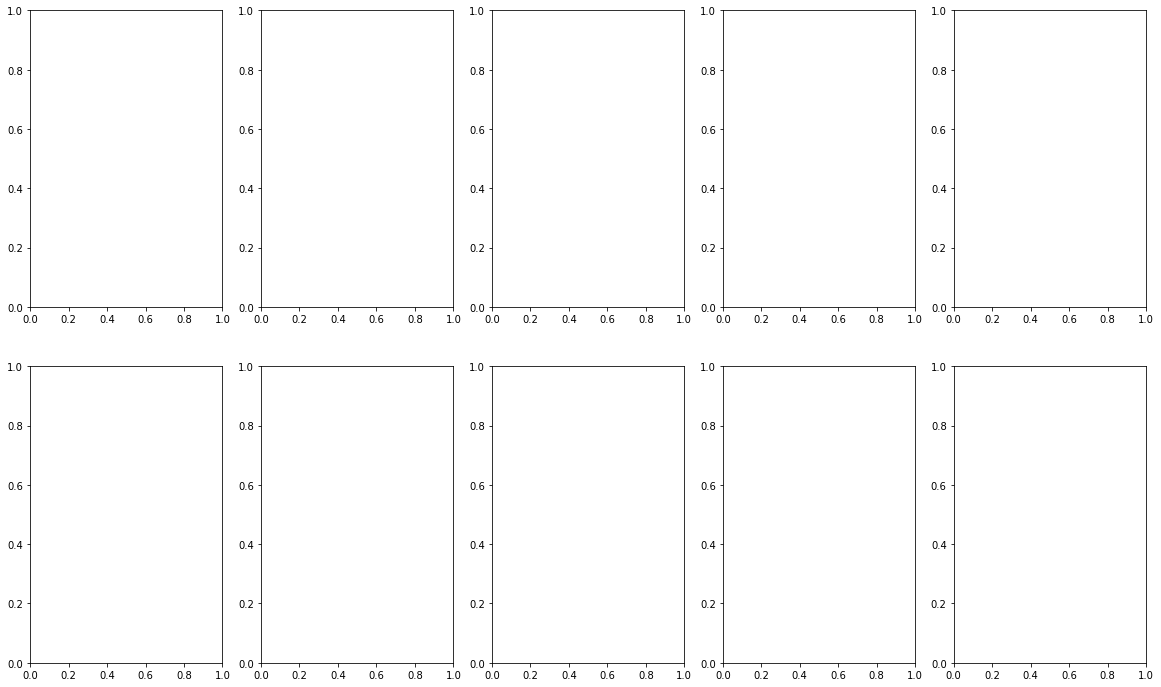

In [102]:
import random

id_list = []
class_ = {0: 'cat', 1: 'dog'}

fig, axes = plt.subplots(2, 5, figsize=(20, 12), facecolor='w')

for ax in axes.ravel():
    
    i = random.choice(submission['id'].values)
    
    label = submission.loc[submission['id'] == i, 'label'].values[0]
    if label > 0.5:
        label = 1
    else:
        label = 0
        
    img_path = os.path.join(dir_test, '{}.jpg'.format(i))
    img = Image.open(img_path)
    
    ax.set_title(class_[label])
    ax.imshow(img)

# Save model


In [31]:
torch.save(model.state_dict(), 'Model_weights.pth')

## Load Model

In [53]:
model_cnn = CNN()
model_cnn.load_state_dict(torch.load('Model_weights.pth'))
model.val()

AttributeError: 'CNN' object has no attribute 'val'

## Predict

In [52]:
with torch.no_grad():
    print(test_loader[1][1])

TypeError: 'DataLoader' object is not subscriptable